In [1]:
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import leastsq
import datetime
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare
import os
import collections
import numpy as np
import requests
from utils import *

from fit_utilities.fitter.fit import FitterTimeSeries, FitterTimeSeriesComparison
# set base path
BASE = !pwd
BASE = Path(BASE[0]).parent.parent
print(f"Base path set to: {BASE}")

# set data path
data_version = "v4.0"
DATA_PATH = BASE / f"data/{data_version}"
print(f"Data path set to: {DATA_PATH}")


Base path set to: /home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/INFN_COVID_ER
Data path set to: /home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/INFN_COVID_ER/data/v4.0


In [25]:
df = download_csv('regioni')

In [20]:
# tm = FitterTimeSeries(df, 'data'
#                       , select = {'denominazione_regione':['Lazio','Lombardia','Emilia-Romagna']}
#                       , multiseries_on = 'denominazione_regione'
#                      )

tm = FitterTimeSeries(df, 'data'
                      , select = {'denominazione_provincia':['Napoli', 'Caserta']}
                      , multiseries_on = 'denominazione_provincia'
                     )

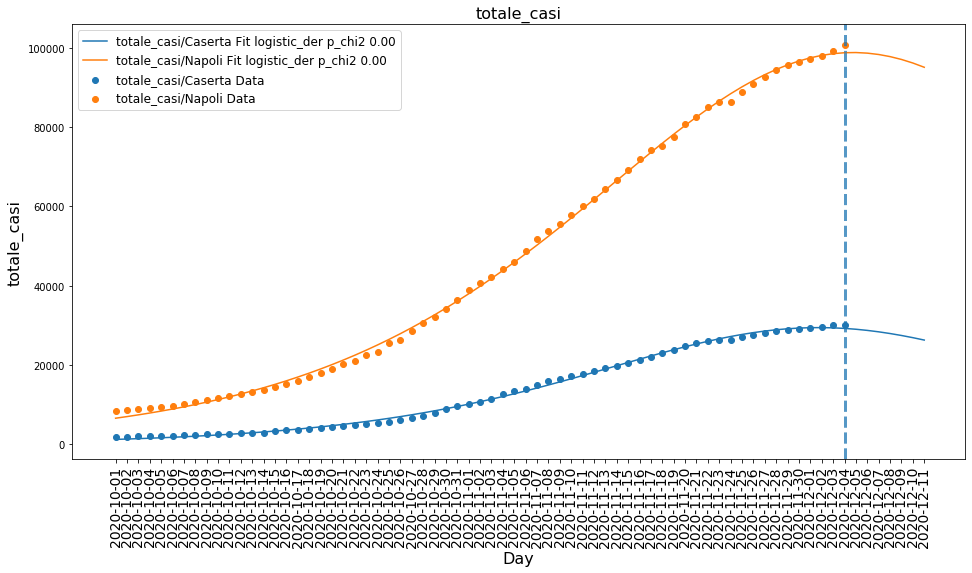

In [22]:
summary = tm.fit_time_series(['totale_casi'] , 
                               start_date = '2020-10-01',end_date =None, n_previsions=7,
                             model ='logistic_der', show_test=True, semilog=False, plot=True)

In [26]:
tmc=FitterTimeSeriesComparison(df, 'data'
                    , select = {'denominazione_regione':['Emilia-Romagna']}
                       ,multiseries_on = 'denominazione_regione'
                              )

gompertz
logistic_der


/home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/INFN_COVID_ER/code/module/fit_utilities/fit_functions/funcs.py:4: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-a*np.exp(-b*x))
/home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/INFN_COVID_ER/code/module/fit_utilities/fit_functions/funcs.py:4: RuntimeWarning: overflow encountered in multiply
  return c*np.exp(-a*np.exp(-b*x))


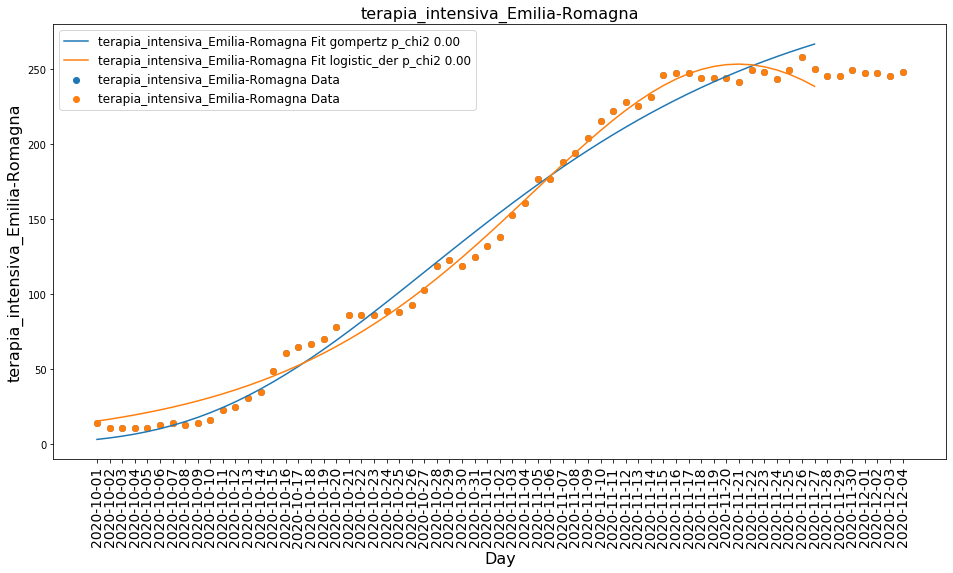

gompertz
logistic_der


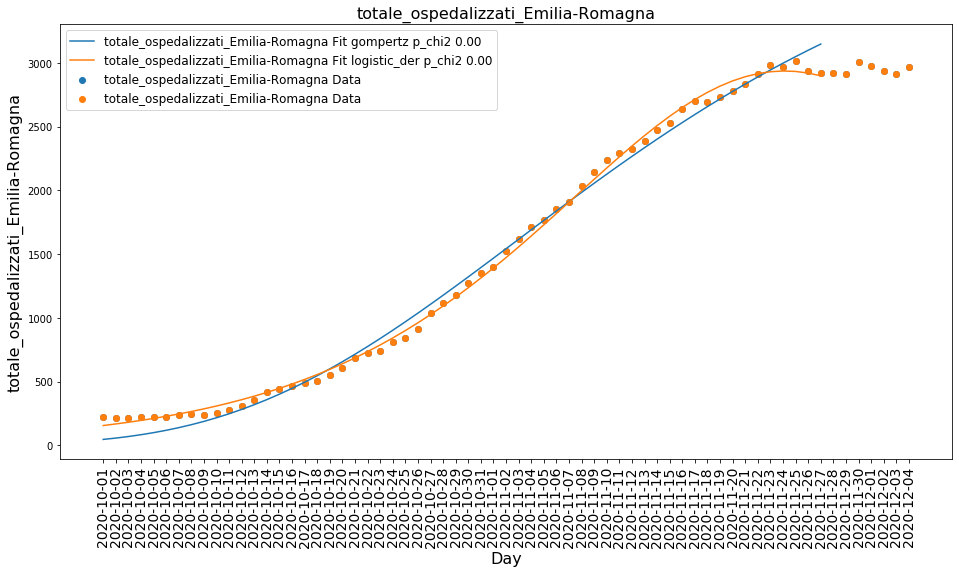

In [27]:
summary = tmc.fit_time_series_comparison(['terapia_intensiva','totale_ospedalizzati'] ,
                               start_date = '2020-10-01',end_date ='2020-11-27', n_previsions=0,
                             model = ['gompertz', 'logistic_der'], show_test=True, semilog=False)